Lets import all the libraries in use and the .py file with all the functions I am going to use to clean the Data.

In [18]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import math,datetime

#My Functions
import src.limpieza_texto as lt
import src.moonphase as moon

sns.set(style="whitegrid")


Open csv file and create a copy. 

In [19]:
data = pd.read_csv("data/attacks.csv", encoding = "ISO-8859-1")
pd.set_option('display.max_columns', None)


In [20]:

data.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [21]:
data.shape

(25723, 24)

In [22]:
#Lets get rid of all the columns I know I am not going to need

data_clean_col = data.drop(columns=["Case Number","Unnamed: 22", "Unnamed: 23", "pdf", "href formula","href","original order","Case Number.1", "Case Number.2", "Investigator or Source"])
data_clean_col.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [23]:
data_clean_col.shape


(25723, 14)

In [24]:
data_clean_col["clean date"] = data_clean_col['Date'].apply(lt.clean_date)

In [25]:
df = data_clean_col.dropna(axis = 0, how = 'all')


In [26]:
df.shape

(6302, 15)

In [27]:
df.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,clean date
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018-06-25
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,2018-06-18
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018-06-09
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018-06-08
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",2018-06-04


In [28]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'clean date'],
      dtype='object')

<AxesSubplot:>

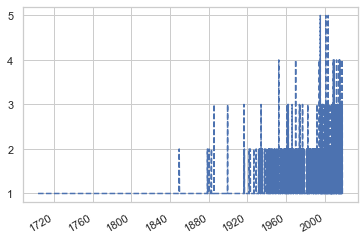

In [29]:
date_values = df['clean date'].value_counts().sort_index()
date_values.plot(style="--")

In [30]:
df["Moon"] = df['clean date'].apply(lt.get_moon)


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Ti

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timesta

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pa

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timest

<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.nattype.NaTType'>
<cla

<ipython-input-30-2d6cf0b1fb78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Moon"] = df['clean date'].apply(lt.get_moon)


In [31]:
df.Moon

0        Waxing Gibbous
1       Waxing Crescent
2       Waning Crescent
3          Last Quarter
4        Waning Gibbous
             ...       
6297                NaN
6298                NaN
6299                NaN
6300                NaN
6301                NaN
Name: Moon, Length: 6302, dtype: object

In [32]:
df['Year_cleaned'] = df[df['Year']>1930]['Year']



<ipython-input-32-cf0f67d75ecd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_cleaned'] = df[df['Year']>1930]['Year']


In [33]:
years_values = df['Year_cleaned'].value_counts().sort_index()


<AxesSubplot:>

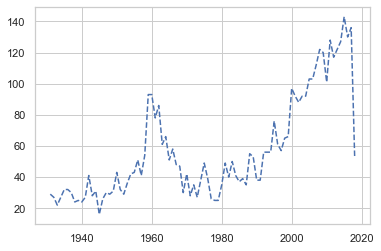

In [34]:
years_values.plot(style="--")

[Text(0.5, 0, 'Year (x5)'), Text(0, 0.5, 'Shark Attacks')]

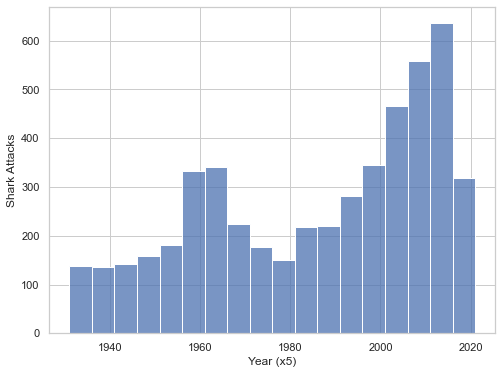

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

ax=sns.histplot(x=df.Year_cleaned, binwidth=5)
ax.set(xlabel="Year (x5)", ylabel = "Shark Attacks")


<ipython-input-36-a726368f31b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].apply(lt.clean_age)
C:\Users\lesto\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


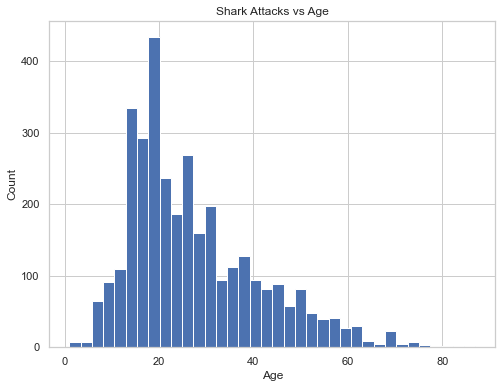

In [36]:

df['Age'] = df['Age'].apply(lt.clean_age)
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.distplot(df['Age'],
             
             hist_kws={"alpha": 1}, 
             kde=False)

plt.xlabel('Age')
plt.ylabel('Shark Attacks')
plt.title('Shark Attacks vs Age')

ax = ax.set(ylabel="Count", xlabel="Age")


C:\Users\lesto\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


'\ndef clean_shark_species(x):\n    print ("this is x:", x)\n    rgx = r"[A-Z][a-z]{1,15}\\s(shark|Shark)"\n    species = re.findall(rgx, x)\n    print (species)\n    \n\ndf["nueva"] = df["Species"].apply(clean_shark_species)\n'

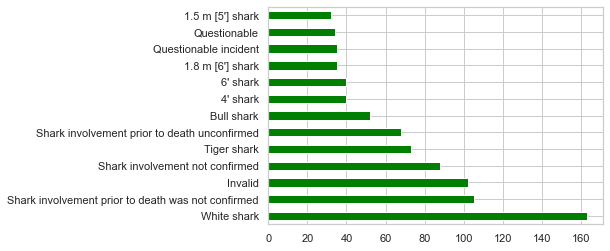

In [37]:
df.rename(columns={'Species ': 'Species'}, inplace=True)
sharks = df['Species'].value_counts()
sharks[sharks > 30].plot.barh(color='green')


'''
def clean_shark_species(x):
    print ("this is x:", x)
    rgx = r"[A-Z][a-z]{1,15}\s(shark|Shark)"
    species = re.findall(rgx, x)
    print (species)
    

df["nueva"] = df["Species"].apply(clean_shark_species)
'''



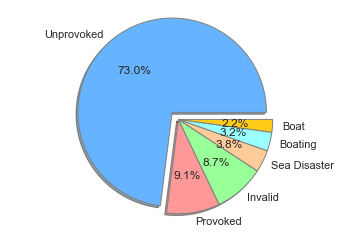

In [38]:
table_count = df['Type'].value_counts()
first_six_type = table_count.iloc[:6]
first_six_type
type_index = first_six_type.index
type_values = first_six_type.values
explode = ( 0.1, 0.0, 0., 0.0, 0.0,0 ) 
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99','#99ffff','#ffcc19']



fig1, ax1 = plt.subplots()
ax1.pie(type_values, explode=explode, labels=type_index, autopct='%1.1f%%', colors=colors,wedgeprops={'edgecolor': 'grey'}, shadow=True)
ax1.axis('equal') 

plt.show()

In [39]:
types1 = table_count.iloc[:6]
types1

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Name: Type, dtype: int64

In [40]:
act1 = types1.drop(['Invalid'])
total = act1.iloc[3:5].sum()
act1["TotalBoating"] = total
types_cleaned =act1.drop(['Boating', 'Boat'])
types_cleaned.sort_values(ascending=False, inplace=True)
types_cleaned


Unprovoked      4595
Provoked         574
TotalBoating     340
Sea Disaster     239
Name: Type, dtype: int64

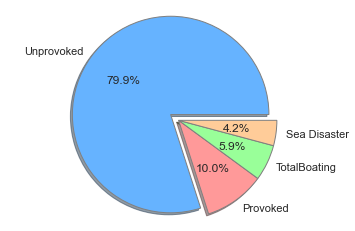

In [41]:
type_index = types_cleaned.index
type_values = types_cleaned.values
explode = ( .1, 0, 0, 0) 
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(type_values, explode=explode, labels=type_index, autopct='%1.1f%%', colors=colors,wedgeprops={'edgecolor': 'grey'}, shadow=True)
ax1.axis('equal') 

plt.show()

<ipython-input-42-896897f1bbe9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fatal Cleaned'] = df['Fatal (Y/N)'].apply(lt.clean_fatal)


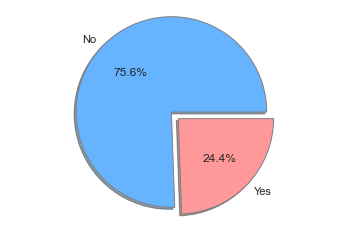

In [42]:
df['Fatal Cleaned'] = df['Fatal (Y/N)'].apply(lt.clean_fatal)
fatal_vals = df['Fatal Cleaned'].value_counts()

fatal_index = fatal_vals.index
fatal_values = fatal_vals.values
explode = ( 0.0, 0.1, ) 
colors = ['#66b3ff','#ff9999']


fig1, ax1 = plt.subplots()
ax1.pie(fatal_values, explode=explode, labels=("No", "Yes"), colors=colors ,autopct='%1.1f%%',wedgeprops={'edgecolor': 'grey'}, shadow=True)
ax1.axis('equal') 

plt.show()

<ipython-input-43-e0ccba6486d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex Cleaned'] = df['Sex '].apply(lt.clean_sex)


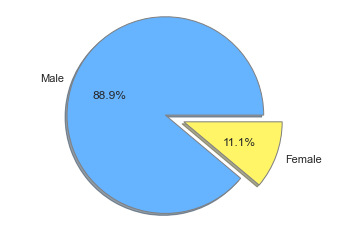

In [43]:
df['Sex Cleaned'] = df['Sex '].apply(lt.clean_sex)
sex_vals = df['Sex Cleaned'].value_counts()

sex_index = sex_vals.index
sex_values = sex_vals.values
explode = ( 0.0, 0.2, ) 
colors = ['#66b3ff','#fff566']


fig1, ax1 = plt.subplots()
ax1.pie(sex_values, explode=explode, labels=("Male", "Female"), colors=colors ,autopct='%1.1f%%',wedgeprops={'edgecolor': 'grey'}, shadow=True)
ax1.axis('equal') 

plt.show()

In [44]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species',
       'clean date', 'Moon', 'Year_cleaned', 'Fatal Cleaned', 'Sex Cleaned'],
      dtype='object')

<AxesSubplot:>

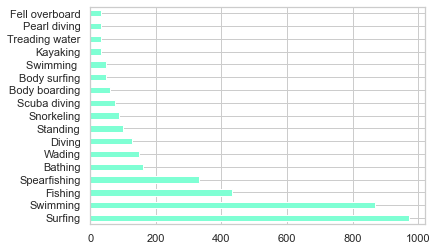

In [45]:
activities = df['Activity'].value_counts()
activities[activities>30].plot.barh(color='aquamarine')

<AxesSubplot:>

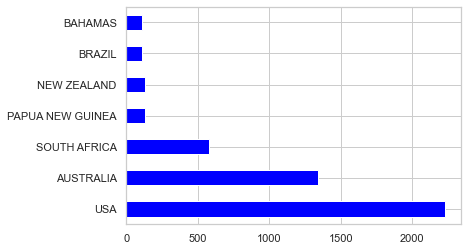

In [46]:
countries_group = df.groupby("Country").filter(lt.filter_countries_by_attack_number)
countries_group_counts = countries_group.Country.value_counts()
countries_group_counts.plot.barh(color='blue')

In [47]:
df.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,clean date,Moon,Year_cleaned,Fatal Cleaned,Sex Cleaned
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018-06-25,Waxing Gibbous,2018.0,N,F
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11.0,Minor injury to left thigh,N,14h00 -15h00,NaN,2018-06-18,Waxing Crescent,2018.0,N,F
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48.0,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018-06-09,Waning Crescent,2018.0,N,M
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018-06-08,Last Quarter,2018.0,N,M
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",2018-06-04,Waning Gibbous,2018.0,N,M


<AxesSubplot:>

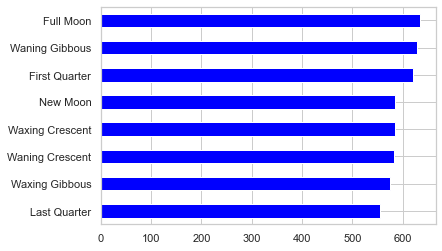

In [50]:
countries_group_counts = df.Moon.value_counts().sort_values()
countries_group_counts.plot.barh(color='blue')

In [17]:
df.sample(50)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,clean date,Moon
1818,05-Oct-2002,2002.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Darren Harrity,M,14,Abrasions on right hand & deep laceration on m...,N,12h00,Blacktip or spinner shark,2002-10-05,New Moon
3534,01-Mar-1967,1967.0,Unprovoked,PAPUA NEW GUINEA,New Britain,"Barawon Beach, near Rabaul",NaN,black male,M,14,Leg bitten,N,NaN,3.7 m [12'] shark,1967-03-01,Waning Gibbous
4436,17-Aug-1951,1951.0,Unprovoked,GREECE,Corfu Island,Off Royal Residence,Swimming,George Athanasenas,M,18,Injured but survived,N,NaN,White shark,1951-08-17,Full Moon
416,07-Jun-2015,2015.0,Unprovoked,USA,Florida,"Lori Wilson Park, Cocoa Beach, Brevard County",Playing,Lucas Vertullo,M,11,Lacerations to right calf,N,10h50,"Bull shark, 5'",2015-06-07,Waning Gibbous
4351,1954,1954.0,Unprovoked,IRAN,Karun River,"Hesamabad area of Shushtar, 420 km from the sea",NaN,Mr. Kasem Jasem,M,NaN,FATAL,Y,NaN,Bull shark suspected due to freshwater habitat,NaT,NaN
3622,Jun-1965,1965.0,Unprovoked,SOUTH PACIFIC OCEAN,NaN,NaN,Treading water,Kikio Naruchima,M,NaN,"FATAL, body not recovered",Y,Morning,,NaT,NaN
1753,Reported 26-Jul-2003,2003.0,Unprovoked,AUSTRALIA,Northern Territory,Nhulunbuy,Surf skiing,Martin Gunda,M,37,"No injury, flung into water when shark bit rud...",N,NaN,NaN,NaT,NaN
5495,Jul-1905,1905.0,Unprovoked,USA,North Carolina,"Ocracoke, Hyde County",Fishing,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,NaT,NaN
797,06-May-2012,2012.0,Unprovoked,USA,California,Off Catalina Island,Paddle boarding,Rose McKereghan,F,15,"No injury, shark bit paddleboard",N,07h20,White shark,2012-05-06,Full Moon
3252,02-Sep-1974,1974.0,Unprovoked,USA,California,"Franklin Point, San Mateo County",Scuba diving (but on surface),Jack Greenlaw,M,41,Minor injuries to hand,N,17h30,"White shark, 5 m to 6 m [16.5 to 20']",1974-09-02,Full Moon
